<a href="https://colab.research.google.com/github/simrran-sharma/MSC-IT-PART1-SEM1/blob/main/FDS/EDA_08_RectangularData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('/content/sample_data/titanic_train.csv')

In [ ]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
train.isnull()

PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 columns]

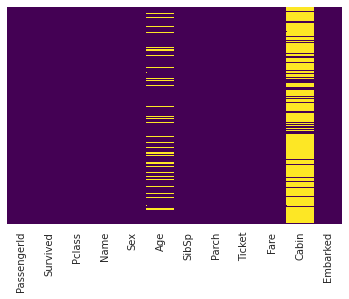

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

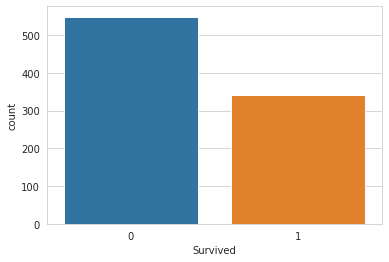

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

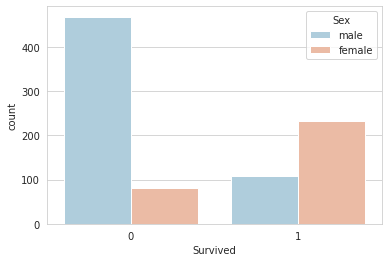

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

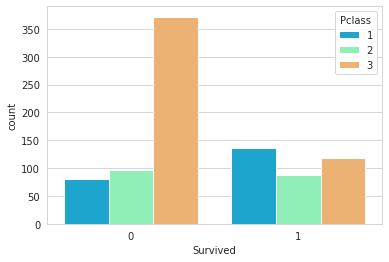

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



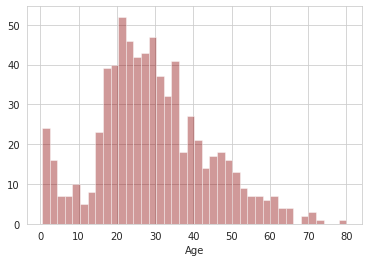

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

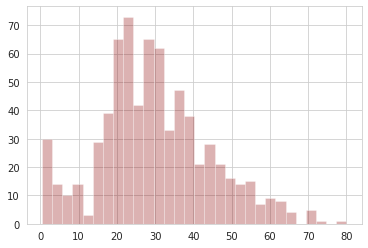

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
sns.countplot(x='SibSp',data=train)

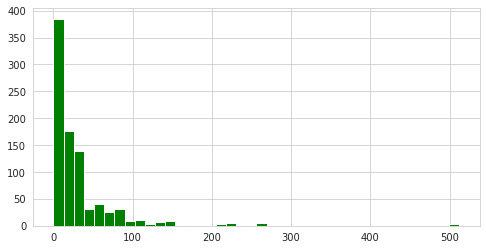

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


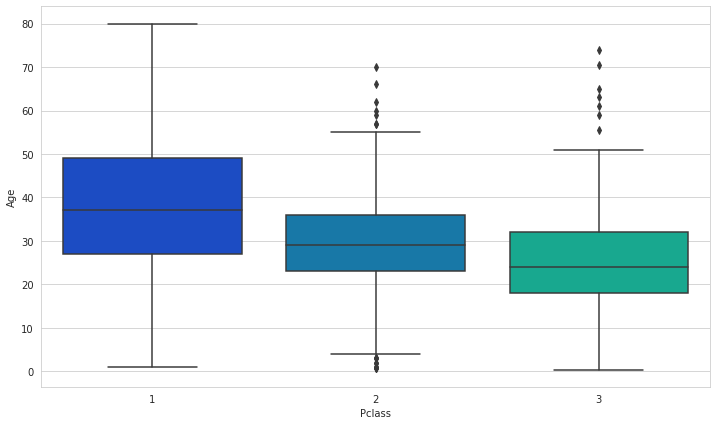

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

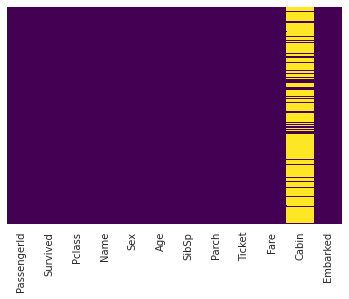

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0            1         0       3  ...         A/5 21171   7.2500         S
1            2         1       1  ...          PC 17599  71.2833         C
2            3         1       3  ...  STON/O2. 3101282   7.9250         S
3            4         1       1  ...            113803  53.1000         S
4            5         0       3  ...            373450   8.0500         S

[5 rows x 11 columns]

In [ ]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

Our data is ready for our model!